
# Parallel Object Detector by Generalized Hough Transform


**Thành viên nhóm**

Tên | MSSV
--- | ---
Lê Anh Vũ | 19120724
Nguyễn Phú Thụ | 19120673
Phạm Thành Đạt | 19120473


**Phân chia nhiệm vụ**

Tên | Nhiệm vụ
--- | ---
Lê Anh Vũ | Đọc bài mãu, viết code 2 phần song song v2, v3, viết report
Nguyễn Phú Thụ | Đọc bài mãu, viết code 2 phần tuần tự 
Phạm Thành Đạt | Đọc bài mẫu, viết code phần song song đầu tiên


## 1. Summary



**Hough Transform** là một kỹ thuật bóc tách vật thể được sử dụng trong bài toán phân tích ảnh, thị giác máy tính, tiền xử lý ảnh kĩ thuật số. Mục đích của kỹ thuật này là tìm ra được các khoảng cách tương đối của vật thể trong một lớp hình dạng cụ thể thông qua thủ tục 'bỏ phiếu'. Nó được dùng cho việc xác định các định dạng có tham số chẳng hạn như những đường thẳng hay vòng tròn.

**Generalized Hough Transform** được phát triển để tìm kiếm các đối tượng phức tạp hơn. Thay vì tìm kiếm các đường thẳng, GHT có thể tìm kiếm bất kỳ hình dạng nào bằng cách tìm kiếm các điểm đặc trưng và tính toán các mẫu Hough tương ứng.

Trong đồ án này, chương trình được viết bằng ngôn ngữ Python 3 và được tối ưu hóa bằng thư viện Numba. Chương trình có thể chạy song song trên CPU và GPU.



## 2. Basic Knowledge



### 2.1 Hough Transform



1. Chọn đặc trưng của đối tượng cần tìm kiếm: Điều này có thể là các đường thẳng, các hình tròn, các đường cong hoặc bất kỳ hình dạng nào khác.

2. Tạo một không gian Hough: Đây là không gian nhiều chiều, trong đó mỗi chiều tương ứng với một tham số của đặc trưng đã chọn. Ví dụ, nếu đặc trưng của bạn là đường thẳng, thì không gian Hough có thể có hai chiều tương ứng với góc nghiêng và khoảng cách từ gốc tọa độ đến đường thẳng.

3. Thực hiện biến đổi Hough: Với mỗi điểm trên đặc trưng, tính toán tất cả các điểm trong không gian Hough tương ứng với các tham số của đặc trưng đó.

4. Tìm kiếm các điểm cao nhất trong không gian Hough: Điểm cao nhất trong không gian Hough tương ứng với tham số của đặc trưng tốt nhất. Ví dụ, trong trường hợp tìm kiếm đường thẳng, điểm cao nhất trong không gian Hough tương ứng với các tham số của đường thẳng tốt nhất.

5. Chuyển đổi các tham số tìm được thành hình dạng: Sau khi tìm được điểm cao nhất trong không gian Hough, bạn có thể chuyển đổi các tham số tương ứng thành hình dạng của đối tượng trong hình ảnh ban đầu.

6. Lọc các kết quả: Cuối cùng, bạn có thể áp dụng các bộ lọc để loại bỏ các kết quả không mong muốn hoặc giả mạo.



### 2.2 Generalized Hough Transform



1. Xác định đặc trưng của đối tượng cần tìm kiếm: Điều này có thể là bất kỳ hình dạng nào, bao gồm các đường thẳng, hình tròn, đường cong, hình tam giác, hình chữ nhật, v.v.

2. Tạo một "ma trận mẫu" (template matrix): Ma trận mẫu này chứa thông tin về đặc trưng của đối tượng trong không gian Hough. Để tạo ma trận mẫu, ta thực hiện các bước tương tự như trong HT, nhưng thay vì tính toán các điểm trong không gian Hough tương ứng với từng điểm trên đặc trưng, ta tính toán các mẫu Hough tương ứng với từng điểm trên đặc trưng.

3. Tính toán ma trận giá trị phi tại mỗi điểm trong hình ảnh: Ma trận giá trị phi chứa thông tin về sự tương đồng giữa mỗi vị trí trong hình ảnh và ma trận mẫu.

4. Tìm kiếm vị trí của đối tượng trong ma trận giá trị phi: Ta tìm vị trí trong ma trận giá trị phi có giá trị lớn nhất. Vị trí này tương ứng với vị trí của đối tượng trong hình ảnh.

5. Chuyển đổi vị trí tìm được thành hình dạng của đối tượng: Sau khi tìm được vị trí của đối tượng, ta chuyển đổi vị trí này thành hình dạng của đối tượng trong hình ảnh ban đầu.

6. Lọc kết quả: Cuối cùng, ta có thể áp dụng các bộ lọc để loại bỏ các kết quả không mong muốn hoặc giả mạo.



## 3. Background



![](https://github.com/lavData/ltss_seminar/blob/main/images/ght.png?raw=1)


### 3.1 Process Template
#### 3.1.1 Image Reading
Đọc ảnh đầu vào bằng thư viện OpenCV. Ở đây ta đọc ảnh Template(đối tượng cần tìm kiếm) và ảnh Source(ảnh chứa đối tượng cần tìm kiếm).

![Template](./images/leaf.png "Template")

![Source](./images/leaves.png "Source")

#### 3.1.2. Gray Scale
Bước này ta sẽ dùng công thức GrayScale để chuyển một pixel 3 chiều (RGB) sang một pixel 1 chiều (GrayScale). Công thức GrayScale được tính như sau:
```
GrayScale = 0.299 * R + 0.587 * G + 0.114 * B
```
Trong đó R, G, B lần lượt là giá trị của 3 kênh màu Red, Green, Blue.

![GrayScale](./images/gray_template.png "GrayScale")

#### 3.1.3 Edge Detector
Áp dụng bộ lọc Sobel để phát hiện cạnh của mẫu. Bộ lọc Sobel được áp dụng theo hai hướng: ngang và dọc.

Ở đây ta sẽ tích chập mỗi pixel của ảnh với ma trận Sobel. Với mỗi filter có công thức như sau:
```
SobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
SobelY = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
```
Sau khi tích chập ta sẽ được 2 ma trận mới là `Gx` và `Gy`.

![Sobel Filter X](./images/sobel_x_template.png "Sobel Filter X")
![Sobel Filter Y](./images/sobel_y_template.png "Sobel Filter Y")

#### 3.1.4 Magnitude and Orientation
Ta sẽ tính toán độ lớn và hướng của cạnh của mẫu bằng cách sử dụng hàm `magnitude` và `orientation` với kết quả từ bước 2.

Với `magnitude` ta sẽ tính độ lớn của cạnh bằng cách sử dụng công thức sau:
```python
magnitude = sqrt(Gx^2 + Gy^2)
```
Với `orientation` ta sẽ tính hướng của cạnh bằng cách sử dụng công thức sau:
```python
orientation = arctan(Gy / Gx)
```

![Magnitude](./images/magnitude_template.png "Magnitude")

#### 3.1.5 Edge Minmax
Áp dụng kỹ thuật edge minmax (edgemns) để tìm các điểm cạnh tối đa trong mẫu.
Cụ thể, ta sẽ slice góc của cạnh thành các góc $\pi$/4 và so sánh với các neighbour của nó tùy thuộc với từng góc. Nếu nó là cực đại trong các neighbour của nó thì nó sẽ được giữ lại, ngược lại nó sẽ bị loại bỏ.

Với slice góc $\pi$/4 ta sẽ có 4 trường hợp:
- Góc 0: ta sẽ so sánh với các điểm ở bên trái và bên phải của nó.
- Góc $\pi$/4: ta sẽ so sánh với các điểm ở bên trái trên và bên phải dưới của nó.
- Góc $\pi$/2: ta sẽ so sánh với các điểm ở bên trên và bên dưới của nó.
- Góc $3\pi$/4: ta sẽ so sánh với các điểm ở bên trái dưới và bên phải trên của nó.

![Edge Minmax](./images/edge_minmax_template.png "Edge Minmax")

#### 3.1.6 Threshold
Từ kết quả của edge minmax ta sẽ áp dụng ngưỡng (threshold) để tạo ra một bức ảnh nhị phân từ các điểm cạnh tối đa đã tìm được.
Nếu một điểm có giá trị lớn hơn ngưỡng thì nó sẽ được gán giá trị 255, ngược lại nó sẽ được gán giá trị 0.

Việc này dùng để cho mẫu ảnh sẽ bớt nhiễu và tập trung vào các điểm cạnh tối đa.

![Threshold](./images/threshold_template.png "Threshold")

#### 3.1.7 R-table computing ($\phi$-table)
Tạo bảng R (R-table) bằng cách kết quả từ bước 3 và 5. Bảng R sẽ được sử dụng trong quá trình tìm kiếm đối tượng trong ảnh.

Cách tạo bảng R như sau:
1. Lấy các chỉ số của các điểm ảnh có giá trị bằng 255 trong mẫu độ xám đã được xử lý ở bước trước đó (bước số 6 trong đoạn code trên). Các điểm ảnh này được coi là các điểm cạnh trong mẫu.
2. Tính toán góc của mỗi điểm cạnh bằng cách lấy phần dư của hướng cạnh tại điểm cạnh đó với 360 độ. Kết quả được lưu vào biến $\phi$.
3. Tính toán chỉ số của bin R (khối R) mà mỗi điểm cạnh sẽ được lưu trữ trong bảng R. Chỉ số này được tính bằng cách chia góc phi cho `DELTA_ROTATION_ANGLE` và lấy phần nguyên của kết quả. `DELTA_ROTATION_ANGLE` là một hằng số được sử dụng để chia các góc thành các bin R khác nhau.
4. Tính toán khoảng cách từ mỗi điểm cạnh tới trung tâm của mẫu. Kết quả được lưu vào biến $r$.
5. Tính toán góc alpha mà mỗi điểm cạnh tạo với trục tọa độ x. Kết quả được lưu vào biến alpha.
6. Với mỗi điểm cạnh, tạo một mục mới trong bảng R chứa các giá trị r và alpha tương ứng. Mục này sẽ được lưu trữ trong bin R được xác định ở bước 3. Các mục này được lưu trữ trong một danh sách các mục trong bảng R, được đại diện bằng một mảng 2D, với các hàng tương ứng với các bin R khác nhau.

![R-table](./images/r_table.png "R-table")
![R-table 2](./images/r_table2.png "R-table 2")

### 3.2 Accumulate Source
Ở bước này ta sẽ lặp lại các bước xử lí ảnh như phần Template. Và sử dụng dữ liệu từ R-table để tìm kiếm đối tượng trong ảnh.
Điểm khác biệt ở phần này chính là phần tích lũy (accumualte) các điểm cạnh tìm được trong ảnh. Với mỗi điểm cạnh ta sẽ có được orientation của điểm cạnh. Dựa vào R-table, ta sẽ tính được điểm center của đối tượng trong ảnh. Từ đó ta sẽ tính lũy thông số center của đối tượng trong ảnh.

Việc tính tọa độ center của đối tượng trong ảnh được tính bởi công thưc sau:
```python
x = x0 + r * cos(alpha + phi)
y = y0 + r * sin(alpha + phi)
```
Trong đó:
- `x0` và `y0` là tọa độ của điểm cạnh trong ảnh.
- `r` là khoảng cách từ điểm cạnh tới trung tâm của mẫu.
- `alpha` là góc mà điểm cạnh tạo với trục tọa độ x.
- `phi` là góc của điểm cạnh trong mẫu.

Sau khi tích lũy xong, ta sẽ có một ma trận tích lũy, từ đó có được các cực đại địa phương (local maxima) của ma trận tích lũy. Các cực đại địa phương này chính là các điểm center của đối tượng trong ảnh.

![Accumulate Source](./images/output.png "Accumulate Source")

### 4. Version Coding

Ở phần này, nhóm sẽ trình bày các phiên bản coding cho thuật toán Generalize Hough Transform và giải thích các phương pháp song song. Nhóm có 5 phiên bản code, bao gồm 2 phiên bản sequence bằng Numpy và Numba, và 3 phiên bản song song, các phiên bản song song này có sự cải thiện về mặt hiệu suất từng phiên bản.

### 4.1 Sequence by Numpy

Vì đây là bài toán xử lí hình ảnh, đa phần các phép tính trên các ma trận, do đó có thể sử dụng Numpy để tăng tốc độ tính toán thay vì code bằng Python thuần.

In [14]:
%%writefile sequence_ght.py
import cv2
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import sys


THRESHOLD = 200
N_ROTATION_SLICES = 72
MAX_SCALE = 1.4
MIN_SCALE = 0.6
DELTA_SCALE_RATIO = 0.1
N_SCALE_SLICE = int((MAX_SCALE - MIN_SCALE) // DELTA_SCALE_RATIO + 1)
BLOCK_SIZE = 10
THRESHOLD_RATIO = 0.3
DELTA_ROTATION_ANGLE = 360 / N_ROTATION_SLICES
URL_TPL = sys.argv[1]
URL_SRC = sys.argv[2]

static_times = {
    'convert_to_gray_tpl': 0,
    'sobel_filter_tpl': 0,
    'magnitude_tpl': 0,
    'orientation_tpl': 0,
    'edgemns_tpl': 0,
    'threshold_tpl': 0,
    'create_r_table': 0,
    'convert_to_gray_src': 0,
    'sobel_filter_src': 0,
    'magnitude_src': 0,
    'orientation_src': 0,
    'edgemns_src': 0,
    'threshold_src': 0,
    'accumulate': 0,
    'total': 0
}


# numpy array sobel filter
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


# Keep Pixel function by numpy
def keep_pixel_np(magnitude: np.ndarray, pixel_gradient: np.ndarray):
    height, width = magnitude.shape
    neighbour_one_i = np.tile(np.arange(width), (height, 1)) - (pixel_gradient == 0) + (pixel_gradient == 45) - (
            pixel_gradient == 135)
    neighbour_one_j = np.tile(np.arange(height)[:, np.newaxis], width) - (pixel_gradient == 45) - (
            pixel_gradient == 90) - (pixel_gradient == 135)
    neighbour_two_i = np.tile(np.arange(width), (height, 1)) + (pixel_gradient == 0) - (pixel_gradient == 45) + (
            pixel_gradient == 135)
    neighbour_two_j = np.tile(np.arange(height)[:, np.newaxis], width) + (pixel_gradient == 45) + (
            pixel_gradient == 90) + (pixel_gradient == 135)

    valid_neighbour_one = (neighbour_one_i >= 0) & (neighbour_one_i < width) & (neighbour_one_j >= 0) & (
            neighbour_one_j < height)
    valid_neighbour_two = (neighbour_two_i >= 0) & (neighbour_two_i < width) & (neighbour_two_j >= 0) & (
            neighbour_two_j < height)

    neighbour_one = np.zeros_like(magnitude).astype(int)
    neighbour_one[valid_neighbour_one] = magnitude[
        neighbour_one_j[valid_neighbour_one], neighbour_one_i[valid_neighbour_one]]
    neighbour_two = np.zeros_like(magnitude).astype(int)
    neighbour_two[valid_neighbour_two] = magnitude[
        neighbour_two_j[valid_neighbour_two], neighbour_two_i[valid_neighbour_two]]
    cur = magnitude

    return (neighbour_one <= cur) & (neighbour_two <= cur)


class SeqGeneralHoughTransform:
    def __init__(self, src: np.array, template: np.array):
        self.src = src
        self.height_src = src.shape[0]
        self.width_src = src.shape[1]
        self.template = template
        self.height_template = template.shape[0]
        self.width_template = template.shape[1]
        self.r_table = [[] for _ in range(N_ROTATION_SLICES)]

    def process_template(self):
        print("----------Start processing template----------\n")
        time_process = 0

        # Gray convert
        start = time.time()
        gray_template = self.convertToGray(self.template)
        end = time.time()
        print(f'\t + Time of gray scale process: {round((end - start), 5)}')
        time_process += end - start
        static_times['convert_to_gray_tpl'] = [end - start]

        # Sobel filter
        start = time.time()
        magnitude_x = self.convolve(sobel_filter_x, gray_template)
        magnitude_y = self.convolve(sobel_filter_y, gray_template)
        end = time.time()
        print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
        time_process += end - start
        static_times['sobel_filter_tpl'] = [end - start]

        # Magnitude and orientation
        start = time.time()
        magnitude = self.magnitude(magnitude_x, magnitude_y)
        orientation = self.orientation(magnitude_x, magnitude_y)
        end = time.time()
        print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
        time_process += end - start



        # Edge minmax
        start = time.time()
        edge_minmax = self.edgemns(magnitude, orientation)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
        static_times['edgemns_tpl'] = [end - start]

        # Threshold
        start = time.time()
        mag_threshold = self.threshold(edge_minmax, THRESHOLD, type_input='template')
        end = time.time()
        print(f'\t + Time of threshold process: {round((end - start), 5)}')
        time_process += end - start
        static_times['threshold_tpl'] = [end - start]

        # Create R-table
        start = time.time()
        self.create_r_table(orientation, mag_threshold)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of creating R-table process: {round((end - start), 5)}')
        static_times['create_r_table'] = [end - start]

        print("----------End processing template----------\n")
        print(f"Time processing template: {time_process}\n")

    def accumulate_src(self):
        print("----------Start accumulating src----------\n")
        time_process = 0

        # Gray convert
        start = time.time()
        gray_src = self.convertToGray(self.src)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of gray scale process: {round((end - start), 5)}')
        static_times['convert_to_gray_src'] = [end - start]

        # Sobel filter
        start = time.time()
        magnitude_x = self.convolve(sobel_filter_x, gray_src)
        magnitude_y = self.convolve(sobel_filter_y, gray_src)
        end = time.time()
        print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
        time_process += end - start
        static_times['sobel_filter_src'] = [end - start]

        # Magnitude and orientation
        start = time.time()
        magnitude = self.magnitude(magnitude_x, magnitude_y)
        orientation = self.orientation(magnitude_x, magnitude_y)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')

        # Edge minmax
        start = time.time()
        edge_minmax = self.edgemns(magnitude, orientation)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of edge minmax process: {round((end - start), 5)}')

        # Threshold
        start = time.time()
        mag_threshold = self.threshold(edge_minmax, THRESHOLD)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of threshold process: {round((end - start), 5)}')
        static_times['threshold_src'] = [end - start]

        # Accumulate
        start = time.time()
        self.accumulate(mag_threshold, orientation)
        end = time.time()
        time_process += end - start
        print(f'\t + Time of accumulate process: {round((end - start), 5)}')
        static_times['accumulate'] = [end - start]
        static_times['total'] += time_process

        print("----------End accumulating src----------\n")
        print(f"Time process: {time_process}s\n")

    def convertToGray(self, image, type_input=None):
        result = np.mean(image.data, axis=2)

        return result

    def convolve(self, sobel_filter: np.array, gray_src: np.array, axis='x', type_input=None):
        if sobel_filter.shape != (3, 3):
            raise Exception("Sobel filter must be 3x3")

        result = np.convolve(gray_src.flatten(), sobel_filter.flatten(), 'same').reshape(gray_src.shape)
  
        return result

    def magnitude(self, magnitude_x: np.array, magnitude_y: np.array, type_input=None):
        result = np.sqrt(np.square(magnitude_x) + np.square(magnitude_y))
      
        return result

    def orientation(self, magnitude_x: np.array, magnitude_y: np.array):
        phi = np.arctan2(magnitude_y, magnitude_x)
        result = np.mod(phi * 180 / np.pi + 360, 360)
        return result

    def edgemns(self, magnitude: np.array, orientation: np.array, type_input=None):
        pixel_gradient = ((orientation // 45).astype(int) * 45 % 180)
        result = np.where(keep_pixel_np(magnitude, pixel_gradient), magnitude, 0)
      
        return result

    def threshold(self, magnitude: np.array, threshold: int, type_input=None):
        result = np.where(magnitude > threshold, 255, 0)
      
        return result

    def create_r_table(self, orientation: np.array, magnitude_threshold: np.array):
        indices_j, indices_i = np.where(magnitude_threshold == 255)

        phi = np.fmod(orientation[indices_j, indices_i], 360)
        i_slice = (phi / DELTA_ROTATION_ANGLE).astype(int)

        center_x = self.width_template // 2
        center_y = self.height_template // 2
        entry_x = center_x - indices_i
        entry_y = center_y - indices_j

        r = np.sqrt(entry_x ** 2 + entry_y ** 2)
        alpha = np.arctan2(entry_y, entry_x)

        for i in range(len(indices_i)):
            entry = {'r': r[i], 'alpha': alpha[i]}
            self.r_table[i_slice[i]].append(entry)

    def accumulate(self, mag_threshold: np.array, orient: np.array):
        width = self.width_src
        height = self.height_src
        wblock = (width + BLOCK_SIZE - 1) // BLOCK_SIZE
        hblock = (height + BLOCK_SIZE - 1) // BLOCK_SIZE

        accumulator = np.zeros((hblock, wblock), dtype=np.int32)
        block_maxima = np.zeros((hblock, wblock), dtype=[('x', int), ('y', int), ('hits', int)])

        _max = 0
        for j in range(height):
            for i in range(width):
                if mag_threshold[j][i] == 255:
                    phi = orient[j][i]
                    i_slice = int(phi // DELTA_ROTATION_ANGLE)
                    entries = self.r_table[i_slice]
                    for entry in entries:
                        r = entry['r']
                        alpha = entry['alpha']
                        xc = int(i + r * math.cos(alpha))
                        yc = int(j + r * math.sin(alpha))

                        if xc < 0 or xc >= width or yc < 0 or yc >= height:
                            continue
                        accumulator[yc // BLOCK_SIZE][xc // BLOCK_SIZE] += 1
                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits'] = accumulator[yc // BLOCK_SIZE][
                            xc // BLOCK_SIZE]
                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['x'] = xc
                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['y'] = yc
                        if accumulator[yc // BLOCK_SIZE][xc // BLOCK_SIZE] > _max:
                            _max = accumulator[yc // BLOCK_SIZE][xc // BLOCK_SIZE]

        maxima_threshold = round(_max * THRESHOLD_RATIO)
        plt.imshow(self.src)
        for j in range(hblock):
            for i in range(wblock):
                if block_maxima[j][i]['hits'] > maxima_threshold:
                    plt.plot([block_maxima[j][i]['x']], [block_maxima[j][i]['y']], marker='o', color="yellow")
        plt.savefig(f'./output_sequence_ght.png')

if __name__ == '__main__':
    src = cv2.imread(URL_SRC)
    template = cv2.imread(URL_TPL)
    ght = SeqGeneralHoughTransform(src, template)
    ght.process_template()
    ght.accumulate_src()

Writing sequence_ght.py


### 4.2 Sequence by Numba

Numba là phiên bản tuần tự tiếp theo, theo đó nhóm sẽ đổi cách coding dựa vào format của Numba. Numba có thể dịch code python sang mã máy, cộng thêm việc cache sẽ tăng tốc hiệu suất rõ rệt so với phiên bản trước.

In [15]:
%%writefile sequence_ght_numba.py
import cv2
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
import sys
import warnings
warnings.filterwarnings('ignore')

THRESHOLD = 200
N_ROTATION_SLICES = 72
MAX_SCALE = 1.4
MIN_SCALE = 0.6
DELTA_SCALE_RATIO = 0.1
N_SCALE_SLICE = int((MAX_SCALE - MIN_SCALE) // DELTA_SCALE_RATIO + 1)
BLOCK_SIZE = 10
THRESHOLD_RATIO = 0.3
DELTA_ROTATION_ANGLE = 360 / N_ROTATION_SLICES
URL_TPL = sys.argv[1]
URL_SRC = sys.argv[2]

# numpy array sobel filter
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


class SeqGeneralHoughTransformNumba:
    def __init__(self, src: np.array, template: np.array):
        self.src = src
        self.height_src = src.shape[0]
        self.width_src = src.shape[1]
        self.template = template
        self.height_template = template.shape[0]
        self.width_template = template.shape[1]
        self.r_table = [[] for _ in range(N_ROTATION_SLICES)]

    def process_template(self):
        print("----------Start processing template----------\n")
        time_process = 0

        # Gray convert
        start = time.time()
        gray_template = self.convertToGray(self.template)
        end = time.time()
        print(f'\t + Time of gray scale process: {round((end - start), 5)}')
        time_process += end - start

        # Sobel filter
        start = time.time()
        magnitude_x = self.convolve(sobel_filter_x, gray_template)
        magnitude_y = self.convolve(sobel_filter_y, gray_template)
        print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
        end = time.time()

        time_process += end - start

        # Magnitude and orientation
        start = time.time()
        magnitude = self.magnitude(magnitude_x, magnitude_y)
        orientation = self.orientation(magnitude_x, magnitude_y)
        print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
        end = time.time()
        time_process += end - start

        # Edge minmax
        start = time.time()
        edge_minmax = self.edgemns(magnitude, orientation)
        end = time.time()
        print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
        time_process += end - start

        # Threshold
        start = time.time()
        mag_threshold = self.threshold(edge_minmax, THRESHOLD, type_input='template')
        end = time.time()
        print(f'\t + Time of threshold process: {round((end - start), 5)}')
        time_process += end - start

        # Create R-table
        start = time.time()
        self.create_r_table(orientation, mag_threshold)
        end = time.time()
        print(f'\t + Time of creating R-table process: {round((end - start), 5)}')
        time_process += end - start

        print("----------End processing template----------\n")
        print(f"Time processing template: {time_process}\n")

    def accumulate_src(self):
        print("----------Start accumulating src----------\n")
        time_process = 0

        # Gray convert
        start = time.time()
        gray_src = self.convertToGray(self.src)
        end = time.time()
        print(f'\t + Time of gray scale process: {round((end - start), 5)}')
        time_process += end - start

        # Sobel filter
        start = time.time()
        magnitude_x = self.convolve(sobel_filter_x, gray_src)
        magnitude_y = self.convolve(sobel_filter_y, gray_src)
        end = time.time()
        print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
        time_process += end - start

        # Magnitude and orientation
        start = time.time()
        magnitude = self.magnitude(magnitude_x, magnitude_y)
        orientation = self.orientation(magnitude_x, magnitude_y)
        end = time.time()
        print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
        time_process += end - start

        # Edge minmax
        start = time.time()
        edge_minmax = self.edgemns(magnitude, orientation)
        end = time.time()
        print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
        time_process += end - start

        # Threshold
        start = time.time()
        mag_threshold = self.threshold(edge_minmax, THRESHOLD)
        end = time.time()
        print(f'\t + Time of threshold process: {round((end - start), 5)}')
        time_process += end - start

        # Accumulate
        start = time.time()
        block_maxima, maxima_threshold = self.accumulate(mag_threshold, orientation)
        end = time.time()
        print(f'\t + Time of accumulate process: {round((end - start), 5)}')
        time_process += end - start

        # Draw
        wblock = (self.width_src + BLOCK_SIZE - 1) // BLOCK_SIZE
        hblock = (self.height_src + BLOCK_SIZE - 1) // BLOCK_SIZE
        plt.imshow(self.src)
        for j in range(hblock):
            for i in range(wblock):
                if block_maxima[j][i]['hits'] > maxima_threshold:
                    plt.plot([block_maxima[j][i]['x']], [block_maxima[j][i]['y']], marker='o', color="yellow")

        plt.savefig(f'./output_sequence_numba.png')

        print("----------End accumulating src----------\n")
        print(f"Time process: {time_process}s\n")

    @jit(cache=True)
    def convertToGray(self, image, type_input=None):
        result = np.zeros(image.shape[:2], dtype=np.float64)
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                result[i][j] = 0.299 * image[i][j][0] + 0.587 * image[i][j][1] + 0.114 * image[i][j][2]

        return result

    @jit(cache=True)
    def convolve(self, sobel_filter: np.array, gray_src: np.array, axis='x', type_input=None):
        result = np.zeros_like(gray_src)
        for i in range(gray_src.shape[0]):
            for j in range(gray_src.shape[1]):
                temp = 0
                for jj in range(-1, 2):
                    for ii in range(-1, 2):
                        jj_pad = max(0, min(gray_src.shape[1] - 1, j + jj))
                        ii_pad = max(0, min(gray_src.shape[0] - 1, i + ii))
                        temp += gray_src[ii_pad][jj_pad] * sobel_filter[ii + 1][jj + 1]
                result[i][j] = temp

        return result

    @jit(cache=True)
    def magnitude(self, magnitude_x: np.array, magnitude_y: np.array, type_input=None):
        result = np.zeros_like(magnitude_x)
        for i in range(magnitude_x.shape[0]):
            for j in range(magnitude_x.shape[1]):
                result[i][j] = math.sqrt(magnitude_x[i][j] ** 2 + magnitude_y[i][j] ** 2)

        return result

    @jit(cache=True)
    def orientation(self, magnitude_x: np.array, magnitude_y: np.array):
        result = np.zeros_like(magnitude_x)
        for i in range(magnitude_x.shape[0]):
            for j in range(magnitude_x.shape[1]):
                result[i][j] = (math.atan2(magnitude_y[i][j], magnitude_x[i][j]) * 180 / math.pi + 360) % 360
        return result

    @jit(cache=True)
    def edgemns(self, magnitude: np.array, orientation: np.array, type_input=None):
        result = np.zeros_like(magnitude)
        for i in range(magnitude.shape[0]):
            for j in range(magnitude.shape[1]):
                pixel_gradient = int(orientation[i][j] // 45) * 45 % 180
                neighbour_one_i = i
                neighbour_one_j = j
                neighbour_two_i = i
                neighbour_two_j = j

                if pixel_gradient == 0:
                    neighbour_one_i = i - 1
                    neighbour_two_i = i + 1
                elif pixel_gradient == 45:
                    neighbour_one_i = i + 1
                    neighbour_one_j = j - 1
                    neighbour_two_i = i - 1
                    neighbour_two_j = j + 1
                elif pixel_gradient == 90:
                    neighbour_one_j = j - 1
                    neighbour_two_j = j + 1
                elif pixel_gradient == 135:
                    neighbour_one_i = i - 1
                    neighbour_one_j = j - 1
                    neighbour_two_i = i + 1
                    neighbour_two_j = j + 1

                neighbour_one_i = max(0, min(magnitude.shape[0] - 1, neighbour_one_i))
                neighbour_one_j = max(0, min(magnitude.shape[1] - 1, neighbour_one_j))
                neighbour_two_i = max(0, min(magnitude.shape[0] - 1, neighbour_two_i))
                neighbour_two_j = max(0, min(magnitude.shape[1] - 1, neighbour_two_j))

                neighbour_one = magnitude[neighbour_one_i][neighbour_one_j]
                neighbour_two = magnitude[neighbour_two_i][neighbour_two_j]

                if (neighbour_one <= magnitude[i][j]) & (neighbour_two <= magnitude[i][j]):
                    result[i][j] = magnitude[i][j]
                else:
                    result[i][j] = 0
        return result

    @jit(cache=True)
    def threshold(self, magnitude: np.array, threshold: int, type_input=None):
        result = np.zeros_like(magnitude)
        for i in range(magnitude.shape[0]):
            for j in range(magnitude.shape[1]):
                if magnitude[i][j] > threshold:
                    result[i][j] = 255
                else:
                    result[i][j] = 0
        return result

    @jit(cache=True)
    def create_r_table(self, orientation: np.array, magnitude_threshold: np.array):
        for i in range(orientation.shape[0]):
            for j in range(orientation.shape[1]):
                if magnitude_threshold[i][j] == 255:
                    phi = orientation[i][j] % 360
                    i_slice = int(phi // DELTA_ROTATION_ANGLE)

                    center_x = self.width_template // 2
                    center_y = self.height_template // 2
                    entry_x = center_x - j
                    entry_y = center_y - i

                    r = math.sqrt(entry_x ** 2 + entry_y ** 2)
                    alpha = math.atan2(entry_y, entry_x)

                    entry = {'r': r, 'alpha': alpha}
                    self.r_table[i_slice].append(entry)

    @jit(cache=True)
    def accumulate4D(self, mag_threshold: np.array, orient: np.array):
        width = self.width_src
        height = self.height_src
        wblock = (width + BLOCK_SIZE - 1) // BLOCK_SIZE
        hblock = (height + BLOCK_SIZE - 1) // BLOCK_SIZE

        accumulator = np.zeros((N_SCALE_SLICE, N_ROTATION_SLICES, hblock, wblock), dtype=np.int32)
        block_maxima = np.zeros((hblock, wblock), dtype=[('x', int), ('y', int), ('hits', int)])

        _max = 0
        for j in range(height):
            for i in range(width):
                if mag_threshold[j][i] == 255:
                    phi = orient[j][i]
                    for i_theta in range(N_ROTATION_SLICES):
                        theta = i_theta * DELTA_ROTATION_ANGLE
                        theta_r = math.radians(theta)
                        i_slice = int(((phi - theta + 360) % 360) // DELTA_ROTATION_ANGLE)
                        entries = self.r_table[i_slice]
                        for entry in entries:
                            r = entry['r']
                            alpha = entry['alpha']
                            for scale in range(N_SCALE_SLICE):
                                s = scale * DELTA_SCALE_RATIO + MIN_SCALE
                                xc = int(i + r * s * math.cos(alpha + theta_r))
                                yc = int(j + r * s * math.sin(alpha + theta_r))

                                if xc < 0 or xc >= width or yc < 0 or yc >= height:
                                    continue
                                accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] += 1
                                if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > \
                                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits']:
                                    block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits'] = \
                                        accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
                                    block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['x'] = xc
                                    block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['y'] = yc
                                    if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > _max:
                                        _max = accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]

        maxima_threshold = round(_max * THRESHOLD_RATIO)

        return block_maxima, maxima_threshold

    @jit(cache=True)
    def accumulate(self, mag_threshold: np.array, orient: np.array):
        width = self.width_src
        height = self.height_src
        wblock = (width + BLOCK_SIZE - 1) // BLOCK_SIZE
        hblock = (height + BLOCK_SIZE - 1) // BLOCK_SIZE

        accumulator = np.zeros((hblock, wblock), dtype=np.int32)
        block_maxima = np.zeros((hblock, wblock), dtype=[('x', int), ('y', int), ('hits', int)])

        _max = 0
        for j in range(self.height_src):
            for i in range(self.width_src):
                if mag_threshold[j][i] == 255:
                    phi = orient[j][i]
                    i_slice = int(phi // DELTA_ROTATION_ANGLE)
                    entries = self.r_table[i_slice]
                    for entry in entries:
                        r = entry['r']
                        alpha = entry['alpha']
                        xc = int(i + r * math.cos(alpha))
                        yc = int(j + r * math.sin(alpha))

                        if xc < 0 or xc >= self.width_src or yc < 0 or yc >= self.height_src:
                            continue
                        accumulator[yc // BLOCK_SIZE][xc // BLOCK_SIZE] += 1
                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits'] = accumulator[yc // BLOCK_SIZE][
                            xc // BLOCK_SIZE]
                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['x'] = xc
                        block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['y'] = yc
                        if accumulator[yc // BLOCK_SIZE][xc // BLOCK_SIZE] > _max:
                            _max = accumulator[yc // BLOCK_SIZE][xc // BLOCK_SIZE]
        maxima_threshold = round(_max * THRESHOLD_RATIO)
        return block_maxima, maxima_threshold

if __name__ == '__main__':
    src = cv2.imread(URL_SRC)
    template = cv2.imread(URL_TPL)
    ght = SeqGeneralHoughTransformNumba(src, template)
    ght.process_template()
    ght.accumulate_src()

Writing sequence_ght_numba.py


### 4.3 Parallel Problem

Trước khi đi tiếp, nhóm sẽ trình bày vấn đề khi chuyển từ cách coding tuần tự sang song song. Ở phiên bản tuần tự, các bin của R-table có số lượng cặp $r$ và $\alpha$ không cố định, số lượng này phụ thuộc vào các Edge pixel của teamplate. Do đó, nếu chúng ta xem R-table là một matrix 2 chiều thì sẽ lãng phí khi thực hiện accumulate ở Source, hoặc nếu chuyển R-table sang một array thì phải thay đổi cách tính toán.

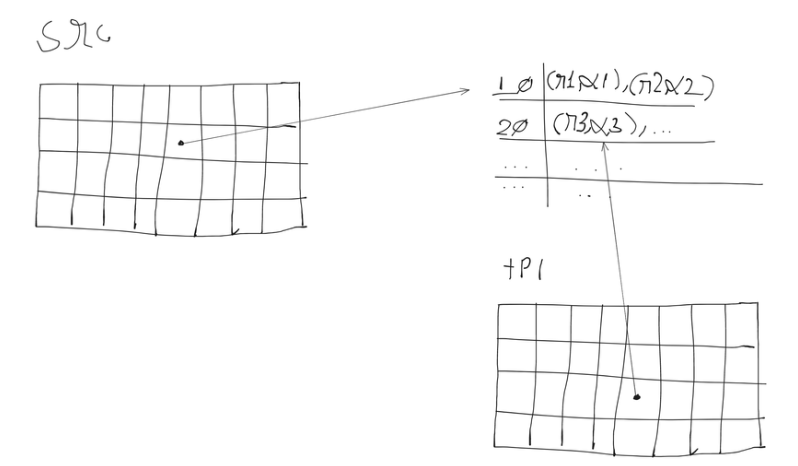

### 4.4 Parallel V1

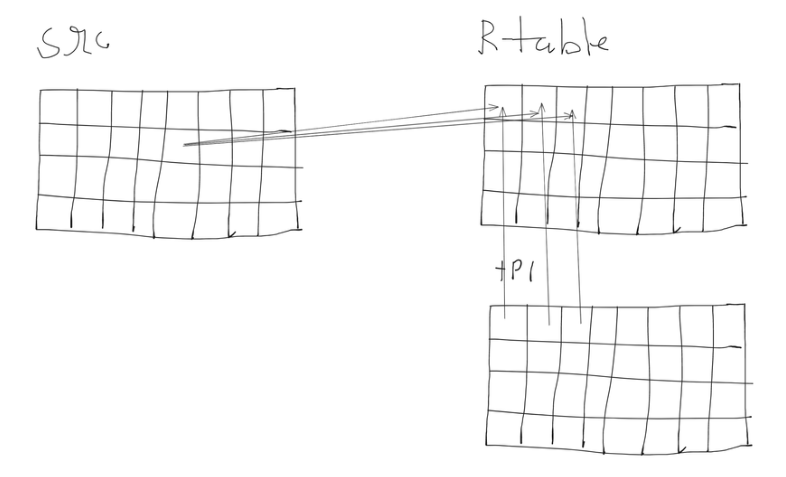

Ở phiên bản này, nhóm sẽ sẽ xem R-Table là một matrix có kích thước bằng với Teamplate, nghĩa là mỗi ô sẽ chứa thông tin $\phi$, $r$ và $\alpha$ của pixel tương ứng. Điều này cũng có nghĩa là những ô không chứa Edge pixel sẽ có góc $\phi$ là -1. 

Khi thực hiện accumulate mỗi Edge pixel trong Source sẽ đi qua hết toàn bộ các phần tử của R-table, nếu ô nào của R-table có góc $\phi$ nào tương ứng với góc $\phi$ đang xét ở accumulate thì ta sẽ tính toán với nó. Lưu ý, mỗi thread tương ứng với mỗi pixel của Source, do đó các pixel nào không phải là Edge pixel sẽ vấn chiếm thread nhưng không tính toán gì.

In [5]:
%%writefile parallel_ght_v1.py
import math
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda
import warnings
warnings.filterwarnings('ignore')
import sys


THRESHOLD = 200
N_ROTATION_SLICES = 72
MAX_SCALE = 1.4
MIN_SCALE = 0.6
DELTA_SCALE_RATIO = 0.1
N_SCALE_SLICE = int((MAX_SCALE - MIN_SCALE) // DELTA_SCALE_RATIO + 1)
BLOCK_SIZE = 10
THRESHOLD_RATIO = 0.3
DELTA_ROTATION_ANGLE = 360 / N_ROTATION_SLICES
PHI_R_TABLE_INDEX = 0
R_R_TABLE_INDEX = 1
ALPHA_R_TABLE_INDEX = 2
URL_TPL = sys.argv[1]
URL_SRC = sys.argv[2]

# numpy array sobel filter
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


@cuda.jit
def convert_to_gray(image: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < image.shape[0] and c < image.shape[1]:
        result[r][c] = 0.299 * image[r][c][0] + 0.587 * image[r][c][1] + 0.114 * image[r][c][2]


@cuda.jit
def convolve(sobel_filter: np.array, gray_src: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < gray_src.shape[0] and c < gray_src.shape[1]:
        temp = 0
        for jj in range(-1, 2):
            for ii in range(-1, 2):
                jj_pad = max(0, min(gray_src.shape[1] - 1, c + jj))
                ii_pad = max(0, min(gray_src.shape[0] - 1, r + ii))
                temp += gray_src[ii_pad][jj_pad] * sobel_filter[ii + 1][jj + 1]
        result[r][c] = temp


@cuda.jit
def magnitude(magnitude_x: np.array, magnitude_y: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_x.shape[0] and c < magnitude_x.shape[1]:
        result[r][c] = math.sqrt(magnitude_x[r][c] ** 2 + magnitude_y[r][c] ** 2)


@cuda.jit
def orientation(magnitude_x: np.array, magnitude_y: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_x.shape[0] and c < magnitude_x.shape[1]:
        result[r][c] = (math.atan2(magnitude_y[r][c], magnitude_x[r][c]) * 180 / math.pi + 360) % 360


@cuda.jit
def edgemns(magnitude: np.array, orientation: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude.shape[0] and c < magnitude.shape[1]:
        pixel_gradient = int(orientation[r][c] // 45) * 45 % 180
        neighbour_one_i = r
        neighbour_one_j = c
        neighbour_two_i = r
        neighbour_two_j = c

        if pixel_gradient == 0:
            neighbour_one_i = r - 1
            neighbour_two_i = r + 1
        elif pixel_gradient == 45:
            neighbour_one_i = r + 1
            neighbour_one_j = c - 1
            neighbour_two_i = r - 1
            neighbour_two_j = c + 1
        elif pixel_gradient == 90:
            neighbour_one_j = c - 1
            neighbour_two_j = c + 1
        elif pixel_gradient == 135:
            neighbour_one_i = r - 1
            neighbour_one_j = c - 1
            neighbour_two_i = r + 1
            neighbour_two_j = c + 1

        neighbour_one_i = max(0, min(magnitude.shape[0] - 1, neighbour_one_i))
        neighbour_one_j = max(0, min(magnitude.shape[1] - 1, neighbour_one_j))
        neighbour_two_i = max(0, min(magnitude.shape[0] - 1, neighbour_two_i))
        neighbour_two_j = max(0, min(magnitude.shape[1] - 1, neighbour_two_j))

        if magnitude[r][c] >= magnitude[neighbour_one_i][neighbour_one_j] and magnitude[r][c] >= magnitude[neighbour_two_i][neighbour_two_j]:
            result[r][c] = magnitude[r][c]
        else:
            result[r][c] = 0


@cuda.jit
def threshold(magnitude: np.array, threshold: int, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude.shape[0] and c < magnitude.shape[1]:
        if magnitude[r][c] > threshold:
            result[r][c] = 255
        else:
            result[r][c] = 0


@cuda.jit
def create_r_table(orientation: np.array, magnitude_threshold: np.array, width_template: int, height_template: int,
                   r_table: np.array):
    r, c = cuda.grid(2)
    if r < orientation.shape[0] and c < orientation.shape[1]:
        if magnitude_threshold[r][c] == 255:
            phi = orientation[r][c] % 360
            i_slice = int(phi // DELTA_ROTATION_ANGLE)

            center_x = width_template // 2
            center_y = height_template // 2
            entry_x = center_x - c
            entry_y = center_y - r

            _r = math.sqrt(entry_x ** 2 + entry_y ** 2)
            alpha = math.atan2(entry_y, entry_x)

            r_table[r, c, PHI_R_TABLE_INDEX] = i_slice
            r_table[r, c, R_R_TABLE_INDEX] = _r
            r_table[r, c, ALPHA_R_TABLE_INDEX] = alpha
        else:
            r_table[r, c, PHI_R_TABLE_INDEX] = -1

@cuda.jit
def num_edge_pixels_and_convert_r_table_to_1D(magnitude_threshold: np.array, _num_edge_pixels: int, r_table_1D: np.array, r_table: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_threshold.shape[0] and c < magnitude_threshold.shape[1]:
        if magnitude_threshold[r][c] == 255:
            index = cuda.atomic.add(_num_edge_pixels, 0, 1)
            r_table_1D[index, PHI_R_TABLE_INDEX] = r_table[r, c, PHI_R_TABLE_INDEX]
            r_table_1D[index, R_R_TABLE_INDEX] = r_table[r, c, R_R_TABLE_INDEX]
            r_table_1D[index, ALPHA_R_TABLE_INDEX] = r_table[r, c, ALPHA_R_TABLE_INDEX]

@cuda.jit
def num_edge_pixels_and_get_pixel_index(magnitude_threshold: np.array, _num_edge_pixels: int, edge_pixels_1D: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_threshold.shape[0] and c < magnitude_threshold.shape[1]:
        if magnitude_threshold[r][c] == 255:
            index = cuda.atomic.add(_num_edge_pixels, 0, 1)
            edge_pixels_1D[index, 0] = r
            edge_pixels_1D[index, 1] = c


@jit(cache=True)
def accumulate4D(mag_threshold: np.array, orient: np.array, width_src: int, height_src: int,
                 accumulator: np.array, block_maxima: np.array, r_table: list):
    _max = 0
    for j in range(height_src):
        for i in range(width_src):
            if mag_threshold[j][i] == 255:
                phi = orient[j][i]
                for i_theta in range(N_ROTATION_SLICES):
                    theta = i_theta * DELTA_ROTATION_ANGLE
                    theta_r = math.radians(theta)
                    i_slice = int(((phi - theta + 360) % 360) // DELTA_ROTATION_ANGLE)
                    entries = r_table[i_slice]
                    for entry in entries:
                        r = entry['r']
                        alpha = entry['alpha']
                        for scale in range(N_SCALE_SLICE):
                            s = scale * DELTA_SCALE_RATIO + MIN_SCALE
                            xc = int(i + r * s * math.cos(alpha + theta_r))
                            yc = int(j + r * s * math.sin(alpha + theta_r))

                            if xc < 0 or xc >= width_src or yc < 0 or yc >= height_src:
                                continue
                            accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] += 1
                            if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > \
                                    block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits']:
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits'] = \
                                    accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['x'] = xc
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['y'] = yc
                                if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > _max:
                                    _max = accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
    maxima_threshold = round(_max * THRESHOLD_RATIO)

    return block_maxima, maxima_threshold


@cuda.jit
def accumulate(edge_pixels: np.array, orient: np.array, width_src: int, height_src: int, accumulator: np.array, r_table: list):
    row, col = cuda.grid(2)
    if row < edge_pixels.shape[0] and col < edge_pixels.shape[1]:
        if edge_pixels[row, col] == 255:
            phi = orient[row, col]
            i_slice = int(phi // DELTA_ROTATION_ANGLE)
            for entries in r_table:
                for entry in entries:
                    if int(entry[PHI_R_TABLE_INDEX]) == i_slice:
                        r = entry[R_R_TABLE_INDEX]
                        alpha = entry[ALPHA_R_TABLE_INDEX]
                        xc = int(col + r * math.cos(alpha))
                        yc = int(row + r * math.sin(alpha))

                        if xc < 0 or xc >= width_src or yc < 0 or yc >= height_src:
                            continue
                        accumulator_index = (yc // BLOCK_SIZE, xc // BLOCK_SIZE)
                        cuda.atomic.add(accumulator, accumulator_index, 1)


src = cv2.imread(URL_SRC)
height_src = src.shape[0]
width_src = src.shape[1]
template = cv2.imread(URL_TPL)
height_template = template.shape[0]
width_template = template.shape[1]
r_table = np.zeros((height_template, width_template, 3), dtype=np.float64)
block_size = (32, 32)
grid_size_template = (math.ceil(height_template / block_size[0]), math.ceil(width_template / block_size[1]))
grid_size_src = (math.ceil(height_src / block_size[0]), math.ceil(width_src / block_size[1]))
wblock = (width_src + BLOCK_SIZE - 1) // BLOCK_SIZE
hblock = (height_src + BLOCK_SIZE - 1) // BLOCK_SIZE

print("----------Start processing template----------\n")
time_process = 0

# Gray convert
gray_template = np.zeros(template.shape[:2], dtype=np.float64)
start = time.time()
convert_to_gray[grid_size_template, block_size](template, gray_template)
end = time.time()
print(f'\t + Time of gray scale process: {round((end - start), 5)}')
time_process += end - start

# Sobel filter
magnitude_x = np.zeros_like(gray_template)
magnitude_y = np.zeros_like(gray_template)
start = time.time()
convolve[grid_size_template, block_size](sobel_filter_x, gray_template, magnitude_x)
convolve[grid_size_template, block_size](sobel_filter_y, gray_template, magnitude_y)
end = time.time()
print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
time_process += end - start

# Magnitude and orientation
magnitude_tpl = np.zeros_like(gray_template)
orientation_tpl = np.zeros_like(gray_template)
start = time.time()
magnitude[grid_size_template, block_size](magnitude_x, magnitude_y, magnitude_tpl)
orientation[grid_size_template, block_size](magnitude_x, magnitude_y, orientation_tpl)
end = time.time()
print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
time_process += end - start

# Edge minmax
edge_minmax_tpl = np.zeros_like(gray_template)
start = time.time()
edgemns[grid_size_template, block_size](magnitude_tpl, orientation_tpl, edge_minmax_tpl)
end = time.time()
print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
time_process += end - start

# Threshold
mag_threshold_tpl = np.zeros_like(gray_template, dtype=np.int32)
start = time.time()
threshold[grid_size_template, block_size](edge_minmax_tpl, THRESHOLD, mag_threshold_tpl)
end = time.time()
print(f'\t + Time of threshold process: {round((end - start), 5)}')
time_process += end - start

# Create R-table
start = time.time()
create_r_table[grid_size_template, block_size](orientation_tpl, mag_threshold_tpl, width_template, height_template,
                                               r_table)
end = time.time()
print(f'\t + Time of creating R-table process: {round((end - start), 5)}')
time_process += end - start

print("----------End processing template----------\n")

print(f"Time processing template: {time_process}\n")


print("----------Start accumulating src----------\n")
time_process = 0

# Gray convert
gray_src = np.zeros(src.shape[:2], dtype=np.float64)
start = time.time()
convert_to_gray[grid_size_src, block_size](src, gray_src)
end = time.time()
print(f'\t + Time of gray scale process: {round((end - start), 5)}')
time_process += end - start

# Sobel filter
magnitude_x = np.zeros_like(gray_src)
magnitude_y = np.zeros_like(gray_src)
start = time.time()
convolve[grid_size_src, block_size](sobel_filter_x, gray_src, magnitude_x)
convolve[grid_size_src, block_size](sobel_filter_y, gray_src, magnitude_y)
end = time.time()
print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
time_process += end - start

# Magnitude and orientation
magnitude_src = np.zeros_like(gray_src)
orientation_src = np.zeros_like(gray_src)
start = time.time()
magnitude[grid_size_src, block_size](magnitude_x, magnitude_y, magnitude_src)
orientation[grid_size_src, block_size](magnitude_x, magnitude_y, orientation_src)
end = time.time()
print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
time_process += end - start

# Edge minmax
edge_minmax_src = np.zeros_like(gray_src)
start = time.time()
edgemns[grid_size_src, block_size](magnitude_src, orientation_src, edge_minmax_src)
end = time.time()
print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
time_process += end - start

# Threshold
mag_threshold_src = np.zeros_like(gray_src, dtype=np.int32)
start = time.time()
threshold[grid_size_src, block_size](edge_minmax_src, THRESHOLD, mag_threshold_src)
end = time.time()
print(f'\t + Time of threshold process: {round((end - start), 5)}')
time_process += end - start

# Accumulate
_accumulator = np.zeros((hblock, wblock), dtype=np.int32)
accumulator = cuda.to_device(_accumulator)
start = time.time()
accumulate[grid_size_src, block_size](mag_threshold_src, orientation_src, width_src, height_src, accumulator, r_table)
end = time.time()
print(f'\t + Time of accumulate process: {round((end - start), 5)}')
accumulator = accumulator.copy_to_host()

maxima_threshold = THRESHOLD_RATIO * accumulator.max()
time_process += end - start
#
# # Draw
plt.imshow(src)
for j in range(hblock):
    for i in range(wblock):
        if accumulator[j][i] > maxima_threshold:
            plt.plot(i * BLOCK_SIZE + BLOCK_SIZE // 2, j * BLOCK_SIZE + BLOCK_SIZE // 2, marker='o', color="yellow")

plt.savefig(f'./output_parallel_v1.png')


print("----------End accumulating src----------\n")
print(f"Time process: {time_process}s\n")

Overwriting parallel_ght_v1.py


### 4.5 Parallel v2

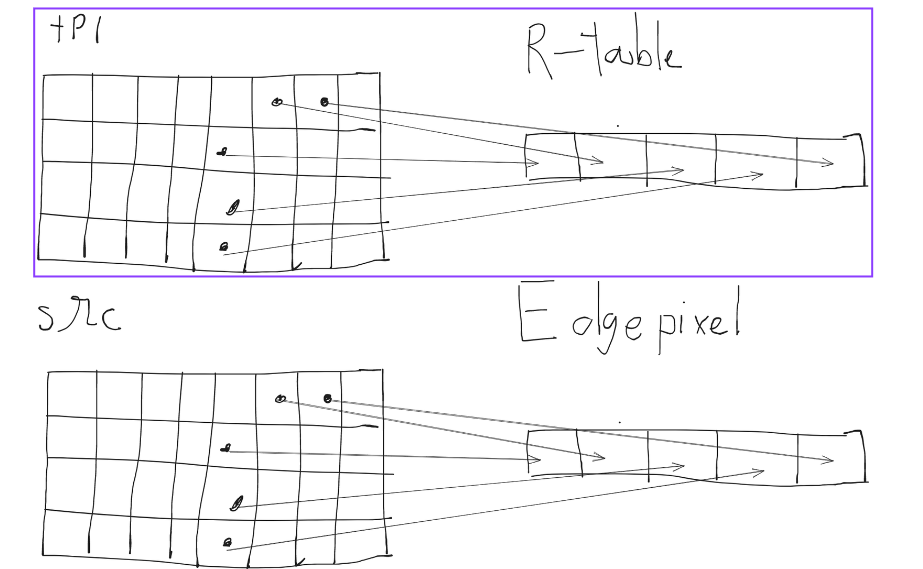

Nhận thấy lãng phí tài nguyên ở cách làm trước, nhóm sẽ chuyển 2 đối tượn là R-table và Source từ matrix 2 chiều sang một array 1 chiều, chỉ lấy những phần từ nào là Edge Pixel, từ dó giảm được số lượng thread và thời gian để khỏi phải traverse các pixel không cần thiết.

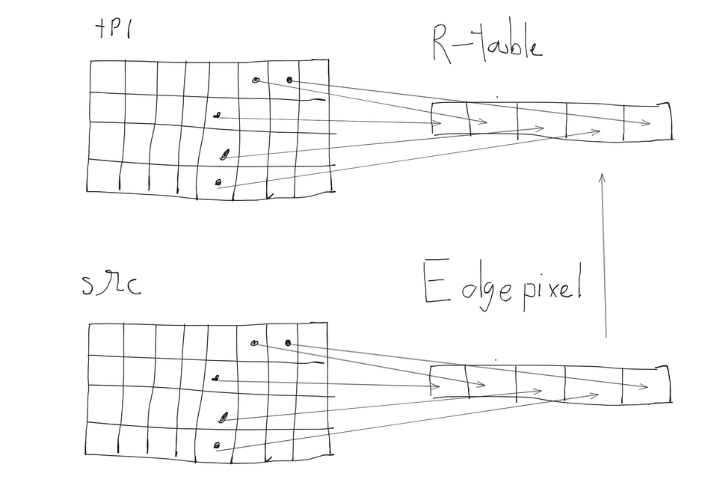

Sau đó khi accumulate, từng phần tử trong mảng Source 1D sẽ đi hết toàn bộ R-Table 1D, sau đó nó hoạt động như Parallel V1

In [9]:
%%writefile parallel_ght_v2.py
import math
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda
import warnings
warnings.filterwarnings('ignore')
import sys

THRESHOLD = 200
N_ROTATION_SLICES = 72
MAX_SCALE = 1.4
MIN_SCALE = 0.6
DELTA_SCALE_RATIO = 0.1
N_SCALE_SLICE = int((MAX_SCALE - MIN_SCALE) // DELTA_SCALE_RATIO + 1)
BLOCK_SIZE = 10
THRESHOLD_RATIO = 0.3
DELTA_ROTATION_ANGLE = 360 / N_ROTATION_SLICES
PHI_R_TABLE_INDEX = 0
R_R_TABLE_INDEX = 1
ALPHA_R_TABLE_INDEX = 2
URL_TPL = sys.argv[1]
URL_SRC = sys.argv[2]

# numpy array sobel filter
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


@cuda.jit
def convert_to_gray(image: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < image.shape[0] and c < image.shape[1]:
        result[r][c] = 0.299 * image[r][c][0] + 0.587 * image[r][c][1] + 0.114 * image[r][c][2]


@cuda.jit
def convolve(sobel_filter: np.array, gray_src: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < gray_src.shape[0] and c < gray_src.shape[1]:
        temp = 0
        for jj in range(-1, 2):
            for ii in range(-1, 2):
                jj_pad = max(0, min(gray_src.shape[1] - 1, c + jj))
                ii_pad = max(0, min(gray_src.shape[0] - 1, r + ii))
                temp += gray_src[ii_pad][jj_pad] * sobel_filter[ii + 1][jj + 1]
        result[r][c] = temp


@cuda.jit
def magnitude(magnitude_x: np.array, magnitude_y: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_x.shape[0] and c < magnitude_x.shape[1]:
        result[r][c] = math.sqrt(magnitude_x[r][c] ** 2 + magnitude_y[r][c] ** 2)


@cuda.jit
def orientation(magnitude_x: np.array, magnitude_y: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_x.shape[0] and c < magnitude_x.shape[1]:
        result[r][c] = (math.atan2(magnitude_y[r][c], magnitude_x[r][c]) * 180 / math.pi + 360) % 360


@cuda.jit
def edgemns(magnitude: np.array, orientation: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude.shape[0] and c < magnitude.shape[1]:
        pixel_gradient = int(orientation[r][c] // 45) * 45 % 180
        neighbour_one_i = r
        neighbour_one_j = c
        neighbour_two_i = r
        neighbour_two_j = c

        if pixel_gradient == 0:
            neighbour_one_i = r - 1
            neighbour_two_i = r + 1
        elif pixel_gradient == 45:
            neighbour_one_i = r + 1
            neighbour_one_j = c - 1
            neighbour_two_i = r - 1
            neighbour_two_j = c + 1
        elif pixel_gradient == 90:
            neighbour_one_j = c - 1
            neighbour_two_j = c + 1
        elif pixel_gradient == 135:
            neighbour_one_i = r - 1
            neighbour_one_j = c - 1
            neighbour_two_i = r + 1
            neighbour_two_j = c + 1

        neighbour_one_i = max(0, min(magnitude.shape[0] - 1, neighbour_one_i))
        neighbour_one_j = max(0, min(magnitude.shape[1] - 1, neighbour_one_j))
        neighbour_two_i = max(0, min(magnitude.shape[0] - 1, neighbour_two_i))
        neighbour_two_j = max(0, min(magnitude.shape[1] - 1, neighbour_two_j))

        if magnitude[r][c] >= magnitude[neighbour_one_i][neighbour_one_j] and magnitude[r][c] >= magnitude[neighbour_two_i][neighbour_two_j]:
            result[r][c] = magnitude[r][c]
        else:
            result[r][c] = 0


@cuda.jit
def threshold(magnitude: np.array, threshold: int, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude.shape[0] and c < magnitude.shape[1]:
        if magnitude[r][c] > threshold:
            result[r][c] = 255
        else:
            result[r][c] = 0


@cuda.jit
def create_r_table(orientation: np.array, magnitude_threshold: np.array, width_template: int, height_template: int,
                   r_table: np.array):
    r, c = cuda.grid(2)
    if r < orientation.shape[0] and c < orientation.shape[1]:
        if magnitude_threshold[r][c] == 255:
            phi = orientation[r][c] % 360
            i_slice = int(phi // DELTA_ROTATION_ANGLE)

            center_x = width_template // 2
            center_y = height_template // 2
            entry_x = center_x - c
            entry_y = center_y - r

            _r = math.sqrt(entry_x ** 2 + entry_y ** 2)
            alpha = math.atan2(entry_y, entry_x)

            r_table[r, c, PHI_R_TABLE_INDEX] = i_slice
            r_table[r, c, R_R_TABLE_INDEX] = _r
            r_table[r, c, ALPHA_R_TABLE_INDEX] = alpha
        else:
            r_table[r, c, PHI_R_TABLE_INDEX] = -1

@cuda.jit
def num_edge_pixels_and_convert_r_table_to_1D(magnitude_threshold: np.array, _num_edge_pixels: int, r_table_1D: np.array, r_table: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_threshold.shape[0] and c < magnitude_threshold.shape[1]:
        if magnitude_threshold[r][c] == 255:
            index = cuda.atomic.add(_num_edge_pixels, 0, 1)
            r_table_1D[index, PHI_R_TABLE_INDEX] = r_table[r, c, PHI_R_TABLE_INDEX]
            r_table_1D[index, R_R_TABLE_INDEX] = r_table[r, c, R_R_TABLE_INDEX]
            r_table_1D[index, ALPHA_R_TABLE_INDEX] = r_table[r, c, ALPHA_R_TABLE_INDEX]

@cuda.jit
def num_edge_pixels_and_get_pixel_index(magnitude_threshold: np.array, _num_edge_pixels: int, edge_pixels_1D: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_threshold.shape[0] and c < magnitude_threshold.shape[1]:
        if magnitude_threshold[r][c] == 255:
            index = cuda.atomic.add(_num_edge_pixels, 0, 1)
            edge_pixels_1D[index, 0] = r
            edge_pixels_1D[index, 1] = c


@jit(cache=True)
def accumulate4D(mag_threshold: np.array, orient: np.array, width_src: int, height_src: int,
                 accumulator: np.array, block_maxima: np.array, r_table: list):
    _max = 0
    for j in range(height_src):
        for i in range(width_src):
            if mag_threshold[j][i] == 255:
                phi = orient[j][i]
                for i_theta in range(N_ROTATION_SLICES):
                    theta = i_theta * DELTA_ROTATION_ANGLE
                    theta_r = math.radians(theta)
                    i_slice = int(((phi - theta + 360) % 360) // DELTA_ROTATION_ANGLE)
                    entries = r_table[i_slice]
                    for entry in entries:
                        r = entry['r']
                        alpha = entry['alpha']
                        for scale in range(N_SCALE_SLICE):
                            s = scale * DELTA_SCALE_RATIO + MIN_SCALE
                            xc = int(i + r * s * math.cos(alpha + theta_r))
                            yc = int(j + r * s * math.sin(alpha + theta_r))

                            if xc < 0 or xc >= width_src or yc < 0 or yc >= height_src:
                                continue
                            accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] += 1
                            if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > \
                                    block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits']:
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits'] = \
                                    accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['x'] = xc
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['y'] = yc
                                if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > _max:
                                    _max = accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
    maxima_threshold = round(_max * THRESHOLD_RATIO)

    return block_maxima, maxima_threshold


@cuda.jit
def accumulate(edge_pixels: np.array, num_edge_pixels: int, orient: np.array, width_src: int, height_src: int,
                 accumulator: np.array, r_table: list):
    index = cuda.grid(1)
    if (index >= num_edge_pixels):
        return

    row = edge_pixels[index, 0]
    col = edge_pixels[index, 1]

    phi = orient[row, col]
    i_slice = int(phi // DELTA_ROTATION_ANGLE)
    for entry in r_table:
        if int(entry[PHI_R_TABLE_INDEX]) == i_slice:
            r = entry[R_R_TABLE_INDEX]
            alpha = entry[ALPHA_R_TABLE_INDEX]
            xc = int(col + r * math.cos(alpha))
            yc = int(row + r * math.sin(alpha))

            if xc < 0 or xc >= width_src or yc < 0 or yc >= height_src:
                continue
            accumulator_index = (yc // BLOCK_SIZE, xc // BLOCK_SIZE)
            value_accum = cuda.atomic.add(accumulator, accumulator_index, 1)


src = cv2.imread(URL_SRC)
height_src = src.shape[0]
width_src = src.shape[1]
template = cv2.imread(URL_TPL)
height_template = template.shape[0]
width_template = template.shape[1]
r_table = np.zeros((height_template, width_template, 3), dtype=np.float64)
block_size = (32, 32)
grid_size_template = (math.ceil(height_template / block_size[0]), math.ceil(width_template / block_size[1]))
grid_size_src = (math.ceil(height_src / block_size[0]), math.ceil(width_src / block_size[1]))
wblock = (width_src + BLOCK_SIZE - 1) // BLOCK_SIZE
hblock = (height_src + BLOCK_SIZE - 1) // BLOCK_SIZE

print("----------Start processing template----------\n")
time_process = 0

# Gray convert
gray_template = np.zeros(template.shape[:2], dtype=np.float64)
start = time.time()
convert_to_gray[grid_size_template, block_size](template, gray_template)
end = time.time()
print(f'\t + Time of gray scale process: {round((end - start), 5)}')
time_process += end - start

# Sobel filter
magnitude_x = np.zeros_like(gray_template)
magnitude_y = np.zeros_like(gray_template)
start = time.time()
convolve[grid_size_template, block_size](sobel_filter_x, gray_template, magnitude_x)
convolve[grid_size_template, block_size](sobel_filter_y, gray_template, magnitude_y)
end = time.time()
print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
time_process += end - start

# Magnitude and orientation
magnitude_tpl = np.zeros_like(gray_template)
orientation_tpl = np.zeros_like(gray_template)
start = time.time()
magnitude[grid_size_template, block_size](magnitude_x, magnitude_y, magnitude_tpl)
orientation[grid_size_template, block_size](magnitude_x, magnitude_y, orientation_tpl)
end = time.time()
print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
time_process += end - start

# Edge minmax
edge_minmax_tpl = np.zeros_like(gray_template)
start = time.time()
edgemns[grid_size_template, block_size](magnitude_tpl, orientation_tpl, edge_minmax_tpl)
end = time.time()
print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
time_process += end - start

# Threshold
mag_threshold_tpl = np.zeros_like(gray_template, dtype=np.int32)
start = time.time()
threshold[grid_size_template, block_size](edge_minmax_tpl, THRESHOLD, mag_threshold_tpl)
end = time.time()
print(f'\t + Time of threshold process: {round((end - start), 5)}')
time_process += end - start

# Create R-tablek
start = time.time()
create_r_table[grid_size_template, block_size](orientation_tpl, mag_threshold_tpl, width_template, height_template,
                                               r_table)
# Convert 2D R_table to 1D R_table
_num_edge_pixels_tpl_np = np.zeros(1, dtype=np.int32)
_num_edge_pixels_tpl = cuda.to_device(_num_edge_pixels_tpl_np)
r_table_1D = np.zeros((height_template * width_template, 3), dtype=np.float64)
num_edge_pixels_and_convert_r_table_to_1D[grid_size_template, block_size](mag_threshold_tpl, _num_edge_pixels_tpl, r_table_1D, r_table)
num_edge_pixels_tpl = _num_edge_pixels_tpl.copy_to_host()[0]
r_table_1D = r_table_1D[:num_edge_pixels_tpl]
end = time.time()
time_process += end - start
print(f'\t + Time of creating R-table process: {round((end - start), 5)}')

print("----------End processing template----------\n")
print(f"Time processing template: {time_process}\n")


print("----------Start accumulating src----------\n")
time_process = 0


# Gray convert
gray_src = np.zeros(src.shape[:2], dtype=np.float64)
start = time.time()
convert_to_gray[grid_size_src, block_size](src, gray_src)
end = time.time()
print(f'\t + Time of gray scale process: {round((end - start), 5)}')
time_process += end - start

# Sobel filter
magnitude_x = np.zeros_like(gray_src)
magnitude_y = np.zeros_like(gray_src)
start = time.time()
convolve[grid_size_src, block_size](sobel_filter_x, gray_src, magnitude_x)
convolve[grid_size_src, block_size](sobel_filter_y, gray_src, magnitude_y)
end = time.time()
print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
time_process += end - start

# Magnitude and orientation
magnitude_src = np.zeros_like(gray_src)
orientation_src = np.zeros_like(gray_src)
start = time.time()
magnitude[grid_size_src, block_size](magnitude_x, magnitude_y, magnitude_src)
orientation[grid_size_src, block_size](magnitude_x, magnitude_y, orientation_src)
end = time.time()
print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
time_process += end - start

# Edge minmax
edge_minmax_src = np.zeros_like(gray_src)
start = time.time()
edgemns[grid_size_src, block_size](magnitude_src, orientation_src, edge_minmax_src)
end = time.time()
print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
time_process += end - start

# Threshold
mag_threshold_src = np.zeros_like(gray_src, dtype=np.int32)
start = time.time()
threshold[grid_size_src, block_size](edge_minmax_src, THRESHOLD, mag_threshold_src)
end = time.time()
print(f'\t + Time of threshold process: {round((end - start), 5)}')
time_process += end - start

# Edge pixels
start = time.time()
_num_edge_pixels_src_np = np.zeros(1, dtype=np.int32)
_num_edge_pixels_src = cuda.to_device(_num_edge_pixels_src_np)
edge_pixel_src = np.zeros((height_src * width_src, 2), dtype=np.int32)
num_edge_pixels_and_get_pixel_index[grid_size_src, block_size](mag_threshold_src, _num_edge_pixels_src, edge_pixel_src)
num_edge_pixels_src = _num_edge_pixels_src.copy_to_host()[0]
edge_pixel_src = edge_pixel_src[:num_edge_pixels_src]

# Accumulate
_accumulator = np.zeros((hblock, wblock), dtype=np.int32)
accumulator = cuda.to_device(_accumulator)
thread_per_block = 32
blocks = (hblock * wblock + thread_per_block - 1) // thread_per_block
# block_maxima = np.zeros((hblock, wblock), dtype=[('x', int), ('y', int), ('hits', int)])
accumulate[blocks, thread_per_block](edge_pixel_src, num_edge_pixels_src, orientation_src, width_src, height_src, accumulator, r_table_1D)
end = time.time()
print(f'\t + Time of accumulate process: {round((end - start), 5)}')
accumulator = accumulator.copy_to_host()

maxima_threshold = THRESHOLD_RATIO * accumulator.max()
time_process += end - start
#
# # Draw
plt.imshow(src)
for j in range(hblock):
    for i in range(wblock):
        if accumulator[j][i] > maxima_threshold:
            plt.plot(i * BLOCK_SIZE + BLOCK_SIZE // 2, j * BLOCK_SIZE + BLOCK_SIZE // 2, marker='o', color="yellow")

plt.savefig(f'./output_parallel_v2.png')
plt.show()

print("----------End accumulating src----------\n")
print(f"Time process: {time_process}s\n")

Overwriting parallel_ght_v2.py


### 4.6 Parallel V3

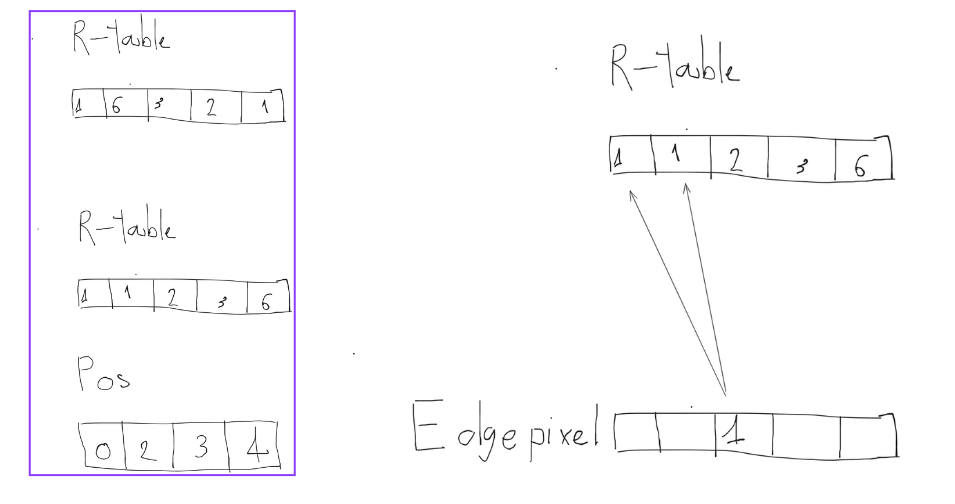

Nhóm nhận thấy có một vấn đề là khi accumlate một phần tử của Source 1D phải đi hết toàn bộ các phần tử R-Table 1D. Vậy nhóm sẽ sử dụng phương pháp lower_bond. Trước đó, nhóm sẽ sort R-Table 1D theo độ lớn của từng góc $\phi$, sau đó sẽ tạo ra một array chứa thông tin các vị trí bắt đầu của từng góc $\phi$ trong R-Table 1D đã sort. Do vậy khi accumulate nếu Edge pixel của Source 1D đang xét có góc $\phi$ là 1 thì nó chỉ cần sét R-Table 1D từ vị trí start của $\phi = 1 $ đến $\phi= 2 - 1$ 

In [12]:
%%writefile parallel_ght_v3.py
import math
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, cuda
import warnings
warnings.filterwarnings('ignore')
import sys

THRESHOLD = 200
N_ROTATION_SLICES = 72
MAX_SCALE = 1.4
MIN_SCALE = 0.6
DELTA_SCALE_RATIO = 0.1
N_SCALE_SLICE = int((MAX_SCALE - MIN_SCALE) // DELTA_SCALE_RATIO + 1)
BLOCK_SIZE = 10
THRESHOLD_RATIO = 0.3
DELTA_ROTATION_ANGLE = 360 / N_ROTATION_SLICES
PHI_R_TABLE_INDEX = 0
R_R_TABLE_INDEX = 1
ALPHA_R_TABLE_INDEX = 2
URL_TPL = sys.argv[1]
URL_SRC = sys.argv[2]

# numpy array sobel filter
sobel_filter_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_filter_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


@cuda.jit
def convert_to_gray(image: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < image.shape[0] and c < image.shape[1]:
        result[r][c] = 0.299 * image[r][c][0] + 0.587 * image[r][c][1] + 0.114 * image[r][c][2]


@cuda.jit
def convolve(sobel_filter: np.array, gray_src: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < gray_src.shape[0] and c < gray_src.shape[1]:
        temp = 0
        for jj in range(-1, 2):
            for ii in range(-1, 2):
                jj_pad = max(0, min(gray_src.shape[1] - 1, c + jj))
                ii_pad = max(0, min(gray_src.shape[0] - 1, r + ii))
                temp += gray_src[ii_pad][jj_pad] * sobel_filter[ii + 1][jj + 1]
        result[r][c] = temp


@cuda.jit
def magnitude(magnitude_x: np.array, magnitude_y: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_x.shape[0] and c < magnitude_x.shape[1]:
        result[r][c] = math.sqrt(magnitude_x[r][c] ** 2 + magnitude_y[r][c] ** 2)


@cuda.jit
def orientation(magnitude_x: np.array, magnitude_y: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_x.shape[0] and c < magnitude_x.shape[1]:
        result[r][c] = (math.atan2(magnitude_y[r][c], magnitude_x[r][c]) * 180 / math.pi + 360) % 360


@cuda.jit
def edgemns(magnitude: np.array, orientation: np.array, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude.shape[0] and c < magnitude.shape[1]:
        pixel_gradient = int(orientation[r][c] // 45) * 45 % 180
        neighbour_one_i = r
        neighbour_one_j = c
        neighbour_two_i = r
        neighbour_two_j = c

        if pixel_gradient == 0:
            neighbour_one_i = r - 1
            neighbour_two_i = r + 1
        elif pixel_gradient == 45:
            neighbour_one_i = r + 1
            neighbour_one_j = c - 1
            neighbour_two_i = r - 1
            neighbour_two_j = c + 1
        elif pixel_gradient == 90:
            neighbour_one_j = c - 1
            neighbour_two_j = c + 1
        elif pixel_gradient == 135:
            neighbour_one_i = r - 1
            neighbour_one_j = c - 1
            neighbour_two_i = r + 1
            neighbour_two_j = c + 1

        neighbour_one_i = max(0, min(magnitude.shape[0] - 1, neighbour_one_i))
        neighbour_one_j = max(0, min(magnitude.shape[1] - 1, neighbour_one_j))
        neighbour_two_i = max(0, min(magnitude.shape[0] - 1, neighbour_two_i))
        neighbour_two_j = max(0, min(magnitude.shape[1] - 1, neighbour_two_j))

        if magnitude[r][c] >= magnitude[neighbour_one_i][neighbour_one_j] and magnitude[r][c] >= magnitude[neighbour_two_i][neighbour_two_j]:
            result[r][c] = magnitude[r][c]
        else:
            result[r][c] = 0


@cuda.jit
def threshold(magnitude: np.array, threshold: int, result: np.array):
    r, c = cuda.grid(2)
    if r < magnitude.shape[0] and c < magnitude.shape[1]:
        if magnitude[r][c] > threshold:
            result[r][c] = 255
        else:
            result[r][c] = 0


@cuda.jit
def create_r_table(orientation: np.array, magnitude_threshold: np.array, width_template: int, height_template: int,
                   r_table: np.array):
    r, c = cuda.grid(2)
    if r < orientation.shape[0] and c < orientation.shape[1]:
        if magnitude_threshold[r][c] == 255:
            phi = orientation[r][c] % 360
            i_slice = int(phi // DELTA_ROTATION_ANGLE)

            center_x = width_template // 2
            center_y = height_template // 2
            entry_x = center_x - c
            entry_y = center_y - r

            _r = math.sqrt(entry_x ** 2 + entry_y ** 2)
            alpha = math.atan2(entry_y, entry_x)

            r_table[r, c, PHI_R_TABLE_INDEX] = i_slice
            r_table[r, c, R_R_TABLE_INDEX] = _r
            r_table[r, c, ALPHA_R_TABLE_INDEX] = alpha
        else:
            r_table[r, c, PHI_R_TABLE_INDEX] = -1

@cuda.jit
def num_edge_pixels_and_convert_r_table_to_1D(magnitude_threshold: np.array, _num_edge_pixels: int, r_table_1D: np.array, r_table: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_threshold.shape[0] and c < magnitude_threshold.shape[1]:
        if magnitude_threshold[r][c] == 255:
            r_table_1D[r * magnitude_threshold.shape[1] + c, PHI_R_TABLE_INDEX] = r_table[r, c, PHI_R_TABLE_INDEX]
            r_table_1D[r * magnitude_threshold.shape[1] + c, R_R_TABLE_INDEX] = r_table[r, c, R_R_TABLE_INDEX]
            r_table_1D[r * magnitude_threshold.shape[1] + c, ALPHA_R_TABLE_INDEX] = r_table[r, c, ALPHA_R_TABLE_INDEX]

@cuda.jit
def num_edge_pixels_and_get_pixel_index(magnitude_threshold: np.array, _num_edge_pixels: int, edge_pixels_1D: np.array):
    r, c = cuda.grid(2)
    if r < magnitude_threshold.shape[0] and c < magnitude_threshold.shape[1]:
        if magnitude_threshold[r][c] == 255:
            index = cuda.atomic.add(_num_edge_pixels, 0, 1)
            edge_pixels_1D[index, 0] = r
            edge_pixels_1D[index, 1] = c


@jit(cache=True)
def accumulate4D(mag_threshold: np.array, orient: np.array, width_src: int, height_src: int,
                 accumulator: np.array, block_maxima: np.array, r_table: list):
    _max = 0
    for j in range(height_src):
        for i in range(width_src):
            if mag_threshold[j][i] == 255:
                phi = orient[j][i]
                for i_theta in range(N_ROTATION_SLICES):
                    theta = i_theta * DELTA_ROTATION_ANGLE
                    theta_r = math.radians(theta)
                    i_slice = int(((phi - theta + 360) % 360) // DELTA_ROTATION_ANGLE)
                    entries = r_table[i_slice]
                    for entry in entries:
                        r = entry['r']
                        alpha = entry['alpha']
                        for scale in range(N_SCALE_SLICE):
                            s = scale * DELTA_SCALE_RATIO + MIN_SCALE
                            xc = int(i + r * s * math.cos(alpha + theta_r))
                            yc = int(j + r * s * math.sin(alpha + theta_r))

                            if xc < 0 or xc >= width_src or yc < 0 or yc >= height_src:
                                continue
                            accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] += 1
                            if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > \
                                    block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits']:
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['hits'] = \
                                    accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['x'] = xc
                                block_maxima[yc // BLOCK_SIZE][xc // BLOCK_SIZE]['y'] = yc
                                if accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE] > _max:
                                    _max = accumulator[scale][i_theta][yc // BLOCK_SIZE][xc // BLOCK_SIZE]
    maxima_threshold = round(_max * THRESHOLD_RATIO)

    return block_maxima, maxima_threshold


@cuda.jit
def accumulate(edge_pixels: np.array, num_edge_pixels: int, orient: np.array, width_src: int, height_src: int,
                 accumulator: np.array, r_table: list, start_position):
    index = cuda.grid(1)
    if (index >= num_edge_pixels):
        return

    row = edge_pixels[index, 0]
    col = edge_pixels[index, 1]

    phi = orient[row, col]
    i_slice = int(phi // DELTA_ROTATION_ANGLE)
    start_entry = start_position[i_slice]
    if i_slice == (N_ROTATION_SLICES - 1):
        end_entry = width_src * height_src
    else:
        end_entry = start_position[i_slice + 1]
    edge_pixels[index, 0] = start_entry
    edge_pixels[index, 1] = end_entry
    for entry in r_table[start_entry:end_entry]:
        if int(entry[PHI_R_TABLE_INDEX]) == i_slice:
            r = entry[R_R_TABLE_INDEX]
            alpha = entry[ALPHA_R_TABLE_INDEX]
            xc = int(col + r * math.cos(alpha))
            yc = int(row + r * math.sin(alpha))

            if xc < 0 or xc >= width_src or yc < 0 or yc >= height_src:
                continue
            accumulator_index = (yc // BLOCK_SIZE, xc // BLOCK_SIZE)
            value_accum = cuda.atomic.add(accumulator, accumulator_index, 1)


src = cv2.imread(URL_SRC)
height_src = src.shape[0]
width_src = src.shape[1]
template = cv2.imread(URL_TPL)
height_template = template.shape[0]
width_template = template.shape[1]
r_table = np.zeros((height_template, width_template, 3), dtype=np.float64)
block_size = (32, 32)
grid_size_template = (math.ceil(height_template / block_size[0]), math.ceil(width_template / block_size[1]))
grid_size_src = (math.ceil(height_src / block_size[0]), math.ceil(width_src / block_size[1]))
wblock = (width_src + BLOCK_SIZE - 1) // BLOCK_SIZE
hblock = (height_src + BLOCK_SIZE - 1) // BLOCK_SIZE

print("----------Start processing template----------\n")
time_process = 0

# Gray convert
gray_template = np.zeros(template.shape[:2], dtype=np.float64)
start = time.time()
convert_to_gray[grid_size_template, block_size](template, gray_template)
end = time.time()
print(f'\t + Time of gray scale process: {round((end - start), 5)}')
time_process += end - start

# Sobel filter
magnitude_x = np.zeros_like(gray_template)
magnitude_y = np.zeros_like(gray_template)
start = time.time()
convolve[grid_size_template, block_size](sobel_filter_x, gray_template, magnitude_x)
convolve[grid_size_template, block_size](sobel_filter_y, gray_template, magnitude_y)
end = time.time()
print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
time_process += end - start

# Magnitude and orientation
magnitude_tpl = np.zeros_like(gray_template)
orientation_tpl = np.zeros_like(gray_template)
start = time.time()
magnitude[grid_size_template, block_size](magnitude_x, magnitude_y, magnitude_tpl)
orientation[grid_size_template, block_size](magnitude_x, magnitude_y, orientation_tpl)
end = time.time()
print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
time_process += end - start

# Edge minmax
edge_minmax_tpl = np.zeros_like(gray_template)
start = time.time()
edgemns[grid_size_template, block_size](magnitude_tpl, orientation_tpl, edge_minmax_tpl)
end = time.time()
print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
time_process += end - start

# Threshold
mag_threshold_tpl = np.zeros_like(gray_template, dtype=np.int32)
start = time.time()
threshold[grid_size_template, block_size](edge_minmax_tpl, THRESHOLD, mag_threshold_tpl)
end = time.time()
print(f'\t + Time of threshold process: {round((end - start), 5)}')
time_process += end - start

# Create R-tablek
start = time.time()
create_r_table[grid_size_template, block_size](orientation_tpl, mag_threshold_tpl, width_template, height_template,
                                               r_table)
# Convert 2D R_table to 1D R_table
_num_edge_pixels_tpl_np = np.zeros(1, dtype=np.int32)
_num_edge_pixels_tpl = cuda.to_device(_num_edge_pixels_tpl_np)
r_table_1D = np.full((height_template * width_template, 3), -1, dtype=np.float64)
num_edge_pixels_and_convert_r_table_to_1D[grid_size_template, block_size](mag_threshold_tpl, _num_edge_pixels_tpl, r_table_1D, r_table)
sort_indices = np.argsort(r_table_1D[:, 0])
sort_r_table_1D = r_table_1D[sort_indices, :]
position_entry_point = np.searchsorted(sort_r_table_1D[:, 0], range(0, N_ROTATION_SLICES), side='left')
end = time.time()
time_process += end - start
print(f'\t + Time of creating R-table process: {round((end - start), 5)}')

print("----------End processing template----------\n")
print(f"Time processing template: {time_process}\n")


print("----------Start accumulating src----------\n")
time_process = 0


# Gray convert
gray_src = np.zeros(src.shape[:2], dtype=np.float64)
start = time.time()
convert_to_gray[grid_size_src, block_size](src, gray_src)
end = time.time()
print(f'\t + Time of gray scale process: {round((end - start), 5)}')
time_process += end - start

# Sobel filter
magnitude_x = np.zeros_like(gray_src)
magnitude_y = np.zeros_like(gray_src)
start = time.time()
convolve[grid_size_src, block_size](sobel_filter_x, gray_src, magnitude_x)
convolve[grid_size_src, block_size](sobel_filter_y, gray_src, magnitude_y)
end = time.time()
print(f'\t + Time of sobel filter process: {round((end - start), 5)}')
time_process += end - start

# Magnitude and orientation
magnitude_src = np.zeros_like(gray_src)
orientation_src = np.zeros_like(gray_src)
start = time.time()
magnitude[grid_size_src, block_size](magnitude_x, magnitude_y, magnitude_src)
orientation[grid_size_src, block_size](magnitude_x, magnitude_y, orientation_src)
end = time.time()
print(f'\t + Time of magnitude and orientation process: {round((end - start), 5)}')
time_process += end - start

# Edge minmax
edge_minmax_src = np.zeros_like(gray_src)
start = time.time()
edgemns[grid_size_src, block_size](magnitude_src, orientation_src, edge_minmax_src)
end = time.time()
print(f'\t + Time of edge minmax process: {round((end - start), 5)}')
time_process += end - start

# Threshold
mag_threshold_src = np.zeros_like(gray_src, dtype=np.int32)
start = time.time()
threshold[grid_size_src, block_size](edge_minmax_src, THRESHOLD, mag_threshold_src)
end = time.time()
print(f'\t + Time of threshold process: {round((end - start), 5)}')
time_process += end - start

# Edge pixels
start = time.time()
_num_edge_pixels_src_np = np.zeros(1, dtype=np.int32)
_num_edge_pixels_src = cuda.to_device(_num_edge_pixels_src_np)
edge_pixel_src = np.zeros((height_src * width_src, 2), dtype=np.int32)
num_edge_pixels_and_get_pixel_index[grid_size_src, block_size](mag_threshold_src, _num_edge_pixels_src, edge_pixel_src)
num_edge_pixels_src = _num_edge_pixels_src.copy_to_host()[0]
edge_pixel_src = edge_pixel_src[:num_edge_pixels_src]

# Accumulate
_accumulator = np.zeros((hblock, wblock), dtype=np.int32)
accumulator = cuda.to_device(_accumulator)
thread_per_block = 32
blocks = (hblock * wblock + thread_per_block - 1) // thread_per_block
# block_maxima = np.zeros((hblock, wblock), dtype=[('x', int), ('y', int), ('hits', int)])
accumulate[blocks, thread_per_block](edge_pixel_src, num_edge_pixels_src, orientation_src, width_src, height_src, accumulator, sort_r_table_1D, position_entry_point)
end = time.time()
print(f'\t + Time of accumulate process: {round((end - start), 5)}')
accumulator = accumulator.copy_to_host()

maxima_threshold = THRESHOLD_RATIO * accumulator.max()
time_process += end - start
#
# # Draw
plt.imshow(src)
for j in range(hblock):
    for i in range(wblock):
        if accumulator[j][i] > maxima_threshold:
            plt.plot(i * BLOCK_SIZE + BLOCK_SIZE // 2, j * BLOCK_SIZE + BLOCK_SIZE // 2, marker='o', color="yellow")

plt.savefig(f'./output_parallel_v3.png')
plt.show()

print("----------End accumulating src----------\n")
print(f"Time process: {time_process}s\n")

Writing parallel_ght_v3.py


## 5. Run code

Ở phần này nhóm sẽ chạy các phiên bản code với những mẫu khác nhau. Với cú pháp
```python
python file_name.py path_teamplate path_source
```

In [16]:
!python sequence_ght.py './images/leaf.png' './images/leaves.png'

----------Start processing template----------

	 + Time of gray scale process: 0.00879
	 + Time of sobel filter process: 0.00493
	 + Time of magnitude and orientation process: 0.01014
	 + Time of edge minmax process: 0.03317
	 + Time of threshold process: 0.00049
	 + Time of creating R-table process: 0.0031
----------End processing template----------

Time processing template: 0.06061530113220215

----------Start accumulating src----------

	 + Time of gray scale process: 0.05958
	 + Time of sobel filter process: 0.0323
	 + Time of magnitude and orientation process: 0.0673
	 + Time of edge minmax process: 0.25426
	 + Time of threshold process: 0.00342
	 + Time of accumulate process: 33.81041
----------End accumulating src----------

Time process: 34.227277517318726s



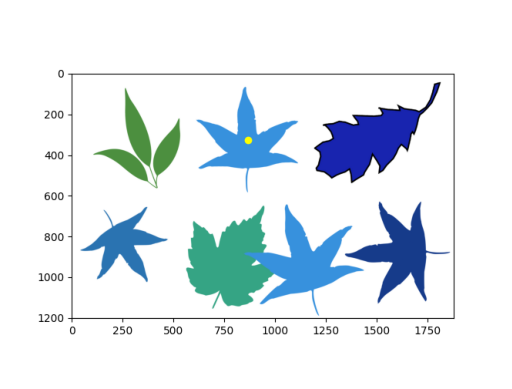

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./output_sequence_ght.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
!python sequence_ght_numba.py './images/leaf.png' './images/leaves.png'

----------Start processing template----------

	 + Time of gray scale process: 0.96353
	 + Time of sobel filter process: -5e-05
	 + Time of magnitude and orientation process: -0.0
	 + Time of edge minmax process: 0.76508
	 + Time of threshold process: 0.37304
	 + Time of creating R-table process: 2.06211
----------End processing template----------

Time processing template: 5.720026969909668

----------Start accumulating src----------

	 + Time of gray scale process: 0.01778
	 + Time of sobel filter process: 0.07965
	 + Time of magnitude and orientation process: 0.0935
	 + Time of edge minmax process: 0.07192
	 + Time of threshold process: 0.53133
	 + Time of accumulate process: 5.11843
----------End accumulating src----------

Time process: 5.9126060009002686s



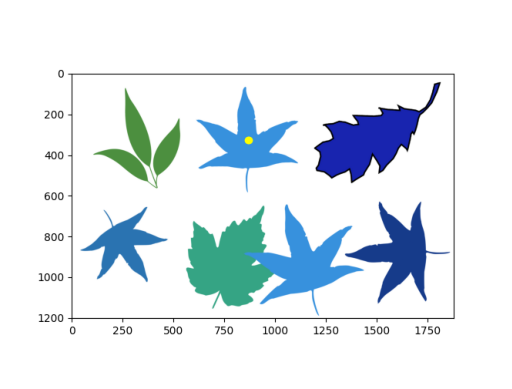

In [20]:
img = mpimg.imread('./output_sequence_numba.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
!python parallel_ght_v1.py './images/leaf.png' './images/leaves.png'

----------Start processing template----------

	 + Time of gray scale process: 0.40731
	 + Time of sobel filter process: 0.17513
	 + Time of magnitude and orientation process: 0.23345
	 + Time of edge minmax process: 0.16849
	 + Time of threshold process: 0.06259
	 + Time of creating R-table process: 0.19324
----------End processing template----------

Time processing template: 1.2402145862579346

----------Start accumulating src----------

	 + Time of gray scale process: 0.02956
	 + Time of sobel filter process: 0.03684
	 + Time of magnitude and orientation process: 0.05943
	 + Time of edge minmax process: 0.03204
	 + Time of threshold process: 0.0137
	 + Time of accumulate process: 1.51674
----------End accumulating src----------

Time process: 1.6883163452148438s



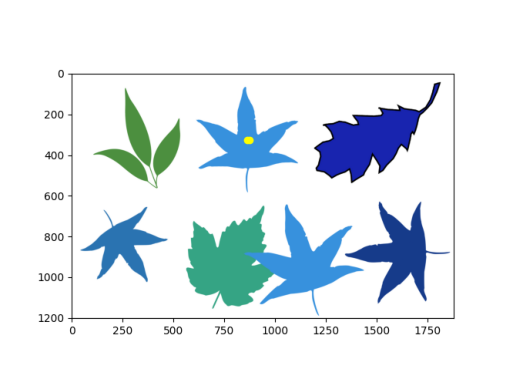

In [22]:
img = mpimg.imread('./output_parallel_v1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [23]:
!python parallel_ght_v2.py './images/leaf.png' './images/leaves.png'

----------Start processing template----------

	 + Time of gray scale process: 0.3947
	 + Time of sobel filter process: 0.15831
	 + Time of magnitude and orientation process: 0.22409
	 + Time of edge minmax process: 0.17385
	 + Time of threshold process: 0.06204
	 + Time of creating R-table process: 0.2997
----------End processing template----------

Time processing template: 1.3126871585845947

----------Start accumulating src----------

	 + Time of gray scale process: 0.02847
	 + Time of sobel filter process: 0.04045
	 + Time of magnitude and orientation process: 0.05121
	 + Time of edge minmax process: 0.02794
	 + Time of threshold process: 0.02037
	 + Time of accumulate process: 0.24566
Figure(640x480)
----------End accumulating src----------

Time process: 0.4140911102294922s



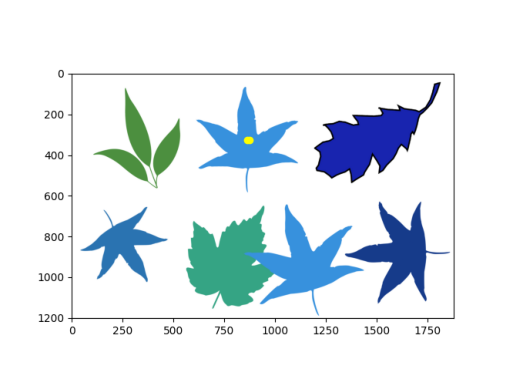

In [24]:
img = mpimg.imread('./output_parallel_v2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [25]:
!python parallel_ght_v3.py './images/leaf.png' './images/leaves.png'

----------Start processing template----------

	 + Time of gray scale process: 0.527
	 + Time of sobel filter process: 0.25459
	 + Time of magnitude and orientation process: 0.34876
	 + Time of edge minmax process: 0.26873
	 + Time of threshold process: 0.10236
	 + Time of creating R-table process: 0.47399
----------End processing template----------

Time processing template: 1.9754371643066406

----------Start accumulating src----------

	 + Time of gray scale process: 0.02697
	 + Time of sobel filter process: 0.04011
	 + Time of magnitude and orientation process: 0.05213
	 + Time of edge minmax process: 0.0281
	 + Time of threshold process: 0.02045
	 + Time of accumulate process: 0.33636
Figure(640x480)
----------End accumulating src----------

Time process: 0.5041179656982422s



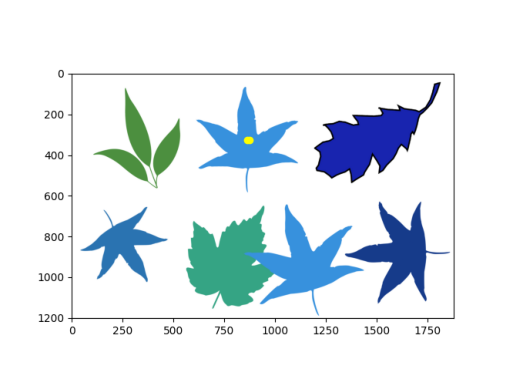

In [26]:
img = mpimg.imread('./output_parallel_v3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Nhận xét**:
- Trước tiên các phiên bản code đều cho một kết quả giống nhau. Tiếp theo các phiên bản dần có kết quả tốt hơn các phiên bản trước. Tuy nhiên phiên bản song song 2 và song song 3 có kết quả khá gần nhau. Nhóm đặt ra giả thuyết là do việc khi sử dụng phương pháp lower bond sẽ hiệu quả hơn khi R-table 1D có số lượng đủ lớn và Accumulator có số lượng Edge pixel đủ lớn. 
- Nhóm đã cải thiện tổng thời gian thực hiện thuật toán từ 34s -> 0.5s ( 68 lần)

## 5. The Challenge

- Thuật toán GHT có khá nhiều bước để xử lí, và khá nhiều kiến thức xử lí ảnh nên nhóm phải nắm kĩ kiến thức.
- Bài mẫu người ta sử dụng các hàm của CUDA nhưng Numba không hỗ trợ, do đó nhóm phải linh hoạt cách xử lí.
- Tài liệu về Hough Transform thì khá nhiều nhưng Generalize Hough Transform thì lại ít hơn nhiều, nên việc tìm tài liệu cũng là một thử thách đối với nhóm.
- Nhóm cũng đã thực hiện được GHT cho 4 chiều là x, y, scale và rotation. Nhưng cũng mất khá lâu đễ ngẫm và thực hiện

## 6. Reference

- [Generalized Hough Transform](https://en.wikipedia.org/wiki/Generalised_Hough_transform)
- [Lines Detection with Hough Transform](https://towardsdatascience.com/lines-detection-with-hough-transform-84020b3b1549#:~:text=The%20Hough%20Transform%20is%20an,and%20quadrilaterals%20of%20specific%20types.)
- [Parallel Object Detector with Generalized Hough Transform](https://github.com/YijieChen720/Parallel-Object-Detector-with-Generalized-Hough-Transform/blob/main/README.md)
- [Sobel Filter](https://homepages.inf.ed.ac.uk/rbf/HIPR2/sobel.htm)

====================================FINISH=========================